# Jonathan Halverson
# Wednesday, October 11, 2017
# Dimensionality reduction

It is not common to be confronted with the data set of one billion records with over a million features per record. Even if this fit on a single machine it would take a long time to train a model on such data. Is it necessary to work with the entire data set or can it be reduced with a negligible loss of information (or even an improvement in the final model due to the reduction)? In most cases a dimensionality reduction technique can be applied to decrease the size of the data set thus reducing training time, reduce noise, visualize the data. The downsides are the computation time required to apply the reduction, features become convoluted and difficult to interpret, pipelines become more complicated and harder to maintain.

Dimensionality reduction is especially important when working with high dimensional data because of the curse of dimensionality. As the number of features grow, records tend to get sparse. For two records to be close, they have to be close in every dimension. Sparsity comes with the tendancy to overfit. To reduce this likelihood, one resorts to dimensionality reduction techniques. The average distance between two randomly chosen points in a 1-million dimensional unit hypercube is 408.25. In attempting to add more data, the number of records needed grows exponentially with the number of features. So the solution is not to seek more more data but to try to reduce the dimensionality is a way that retains as much information as possible.

It is important to always try to train on the full data set before trying to reduce dimensionality since in general these techniques throw away data.

The two main approaches are projection (PCA, kernel PCA) and manifold learning (LLE, t-SNE, Isomaps). Projection is informally a squashing operation while manifold learning is an unrolling operation. How to choose which one? It depends on the structure of the data. If possible try no dimensionality reduction, then a projection method then a manifold method. One can use two methods on the same data set such as PCA with a high explained variance percentage to get rid of useless features and noise, and then say LLE.

The methods mentioned above are all unsupervised. LDA can be used for dimensionality reduction. It takes into account class labels so it is supervised.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [2]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.01)

Make RGB color triplet for each point: 

In [3]:
import numpy as np

clr = np.c_[t, t, t]
clr = clr - clr.min()
clr = clr / clr.max()
#clr = np.zeros(3 * t.shape[0]).reshape(t.shape[0], 3)

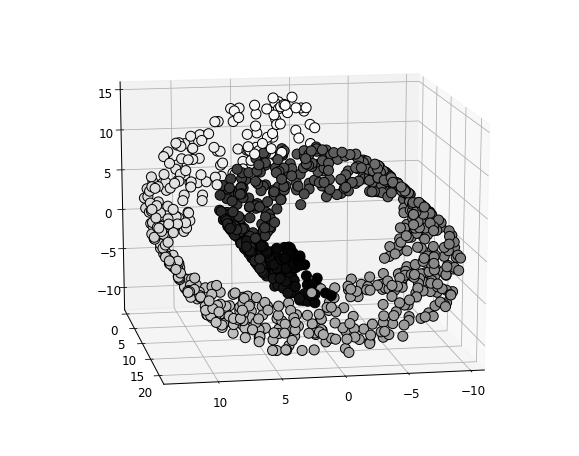

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], zs=X[:,2], zdir='z', s=100, c=clr, depthshade=False, edgecolor='k')
ax.view_init(elev=15, azim=80)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

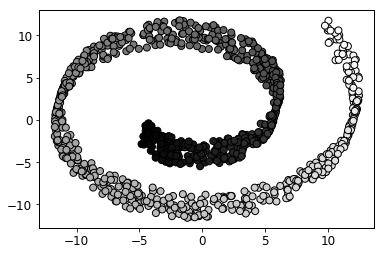

In [7]:
plt.scatter(X_2d[:,0], X_2d[:,1], c=clr, edgecolor='k')

We see that projecting the data was not the right operation since there is overlap and the black dots are not the furthest away from the white dots. One should try a manifold technique. We will return to this in a moment.

In [8]:
pca.explained_variance_ratio_

array([ 0.39755296,  0.32722626])

In [9]:
pca.explained_variance_

array([ 51.03655457,  42.00824217])

We see that a significant amount of the initial variance (20 percent) has been lost.

Kernel PCA allows for nonlinear projections for dimensionality reduction. It is often good at preserving cluster of instances after projection. There are hyperparameters that must be found.

Kernel PCA allows for nonlinear projections for dimensionality reduction. It is often good at preserving cluster of instances after projection. There are hyperparameters that must be found.

In [10]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, fit_inverse_transform=True)
X_2d_kpca = kpca.fit_transform(X)

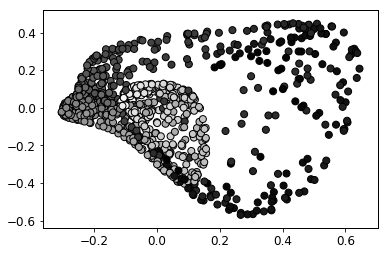

In [11]:
plt.scatter(X_2d_kpca[:,0], X_2d_kpca[:,1], c=clr, edgecolor='k')

To find the optimal hyperparameters for kPCA, one can setup a pipeline when doing the training. This requires class information which the make_swiss_roll does not provide.

One way to judge the quality of the dimensionality reduction technique is to compute the reconstruction error, which the mean squared distance between the original values and what one finds after transforming to the original space. In general information is lost.

In [12]:
X_preimage = kpca.inverse_transform(X_2d_kpca)

from sklearn.metrics import mean_squared_error
mean_squared_error(X_preimage, X)

31.126165819713446

## Manifold learning

### Locally linear embedding (LLE)

In [13]:
from sklearn.manifold import LocallyLinearEmbedding

In [14]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, random_state=42)
X_2d_lle = lle.fit_transform(X)

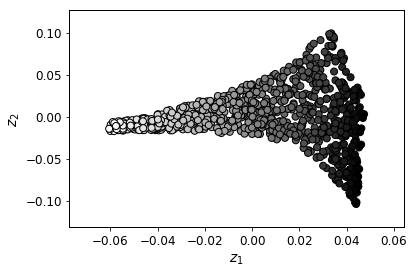

In [15]:
plt.scatter(X_2d_lle[:,0], X_2d_lle[:,1], c=clr, edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

We see that the method has nicely unrolled the roll keeping neighboring records close together. Note that the outcome is sensitive to the number of neighbors.

### Isomap

This method creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances between instances. The geodesic distance between two nodes is the number of nodes on the shortest path between those nodes.

In [16]:
from sklearn.manifold import Isomap

In [17]:
ism = Isomap(n_neighbors=10, n_components=2)
X_2d_ism = ism.fit_transform(X)

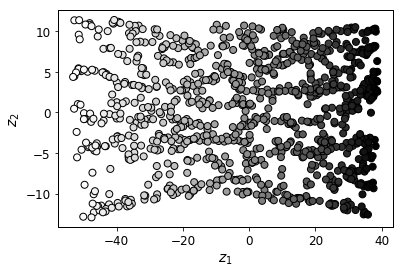

In [18]:
plt.scatter(X_2d_ism[:,0], X_2d_ism[:,1], c=clr, edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

This method appears to have worked better than LLE.

### Multidimensional scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.

In [19]:
from sklearn.manifold import MDS

In [20]:
mds = MDS(n_components=2)
X_2d_mds = mds.fit_transform(X)

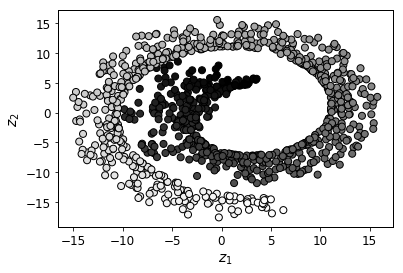

In [21]:
plt.scatter(X_2d_mds[:,0], X_2d_mds[:,1], c=clr, edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

### t-Distributed Stochastic Neighbor Embedding

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_2d_tsne = tsne.fit_transform(X)

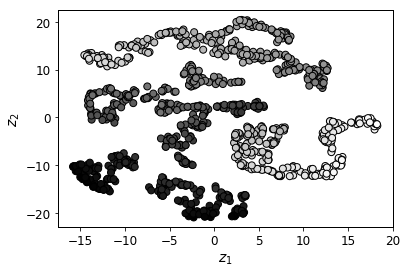

In [24]:
plt.scatter(X_2d_tsne[:,0], X_2d_tsne[:,1], c=clr, edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

Very interesting result. One can see that it has created clusters of similar records. It reduces dimensionality by trying to keep similar instances close and dissimilar ones apart. It is mostly used for visualization and in particular the visualization of clusters.

## Putting it all together on the MNIST data set

In [25]:
from sklearn.datasets import load_digits

In [26]:
digits = load_digits()
X = digits.data
y = digits.target

In [27]:
X.shape, y.shape

((1797, 64), (1797,))

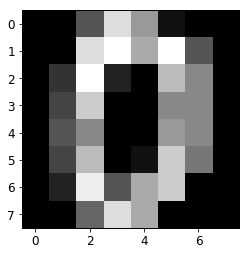

In [82]:
plt.imshow(X[0].reshape(8, 8), aspect='equal', cmap=plt.cm.gray)

Split the data and shuffle the records and the corresponding labels to ensure stratified CV.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
import numpy as np

idx = np.random.permutation(y_train.shape[0])
X_train = X_train[idx]
y_train = y_train[idx]

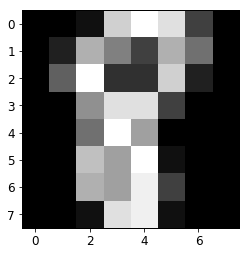

In [81]:
plt.imshow(X_train[0].reshape(8, 8), aspect='equal', cmap=plt.cm.gray)

In [32]:
y_train[0]

8

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [34]:
rf_clf = Pipeline([('std_sc', StandardScaler()), ('rf', RandomForestClassifier())])
param_grid = {'rf__n_estimators':[25, 50, 100, 200]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'rf__n_estimators': [25, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [35]:
grid_search.best_params_

{'rf__n_estimators': 200}

In [1]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

NameError: name 'grid_search' is not defined

Now let's try to use PCA to reduce the number of dimensions and see how the accuracy and training time are affected:

In [37]:
#from sklearn.neural_network import MLPClassifier

In [38]:
rf_pca_clf = Pipeline([('std_sc', StandardScaler()),
                       ('pca', PCA(n_components=16)),
                       ('rf', RandomForestClassifier())])

In [39]:
grid_search = GridSearchCV(rf_pca_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            ...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'rf__n_estimators': [25, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [40]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.97555555555555551

In [41]:
grid_search.best_params_

{'rf__n_estimators': 200}

We see that there is only a marginal hit to the accuracy when the number of dimensions is reduced to 16 using linear PCA. What do dome images look like after PCA?

In [42]:
pca = PCA(n_components=16)
X_reduced = pca.fit_transform(X_train)

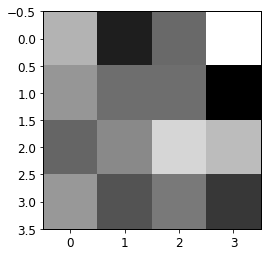

In [43]:
plt.imshow(X_reduced[0].reshape(4, 4), aspect='equal', cmap=plt.cm.gray)

In [44]:
y[0]

0

We see that the digit is completely unrecognizable after PCA has been applied.

### Add a boolean hyperparameter to remove edge pixels

Here we create a class which allows us to either keep or remove the edges pixel of each image. The class derives from BaseEstimator which allows us to include it in the pipeline and grid search CV.

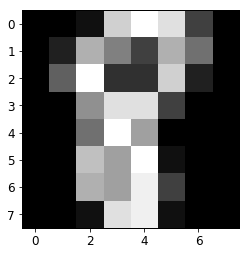

In [45]:
plt.imshow(X_train[0].reshape(8, 8), aspect='equal', cmap=plt.cm.gray)

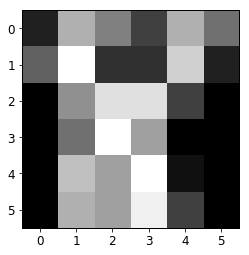

In [46]:
plt.imshow(X_train[0].reshape(8, 8)[1:7,1:7], aspect='equal', cmap=plt.cm.gray)

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveEdges(BaseEstimator, TransformerMixin):
     def __init__(self, remove_edges=True):
          self.remove_edges = remove_edges
     def fit(self, feature_matrix, y=None):
          return self
     def transform(self, feature_matrix):
          if self.remove_edges:
               idx_exclude = range(0, 8) + range(56, 64) + range(8, 56, 8) + range(15, 63, 8)
               idx_include = list(set(range(64)) - set(idx_exclude))
               return feature_matrix[:,idx_include]
          else:
               return feature_matrix

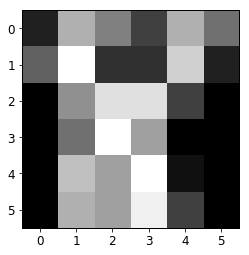

In [57]:
rm_ed = RemoveEdges(remove_edges=True)
X_rm_ed = rm_ed.transform(X_train)
plt.imshow(X_rm_ed[0].reshape(6, 6), aspect='equal', cmap=plt.cm.gray)

In [58]:
y_train[0]

8

In [51]:
rf_rm_pca_clf = Pipeline([('rm_edges', RemoveEdges()),
                          ('std_sc', StandardScaler()),
                          ('pca', PCA(n_components=16)),
                          ('rf', RandomForestClassifier())])

In [52]:
param_grid = {'rm_edges__remove_edges':[True, False], 'rf__n_estimators':[25, 50, 100, 200]}
grid_search = GridSearchCV(rf_rm_pca_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('rm_edges', RemoveEdges(remove_edges=True)), ('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, cla...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'rf__n_estimators': [25, 50, 100, 200], 'rm_edges__remove_edges': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [53]:
grid_search.cv_results_

{'mean_fit_time': array([ 0.18160582,  0.18117537,  0.36433411,  0.39318552,  0.72876258,
         0.76684232,  1.47270403,  1.42680359]),
 'mean_score_time': array([ 0.01942816,  0.0190444 ,  0.03874841,  0.03878889,  0.07485204,
         0.0731492 ,  0.16938896,  0.15182757]),
 'mean_test_score': array([ 0.92724573,  0.93318486,  0.93318486,  0.94209354,  0.94060876,
         0.94209354,  0.94209354,  0.94432071]),
 'mean_train_score': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 'param_rf__n_estimators': masked_array(data = [25 25 50 50 100 100 200 200],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_rm_edges__remove_edges': masked_array(data = [True False True False True False True False],
              mask = [False False False False False False False False],
        fill_value = ?),
 'params': ({'rf__n_estimators': 25, 'rm_edges__remove_edges': True},
  {'rf__n_estimators': 25, 'rm_edges__remove_edges': False},
  {'rf

In [61]:
grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']

(({'rf__n_estimators': 25, 'rm_edges__remove_edges': True},
  {'rf__n_estimators': 25, 'rm_edges__remove_edges': False},
  {'rf__n_estimators': 50, 'rm_edges__remove_edges': True},
  {'rf__n_estimators': 50, 'rm_edges__remove_edges': False},
  {'rf__n_estimators': 100, 'rm_edges__remove_edges': True},
  {'rf__n_estimators': 100, 'rm_edges__remove_edges': False},
  {'rf__n_estimators': 200, 'rm_edges__remove_edges': True},
  {'rf__n_estimators': 200, 'rm_edges__remove_edges': False}),
 array([ 0.92724573,  0.93318486,  0.93318486,  0.94209354,  0.94060876,
         0.94209354,  0.94209354,  0.94432071]))

We see that the mean test score is lower in every case when edges are removed. This is not surprising since there is information being thrown away when the edges are removed.

In [54]:
grid_search.best_estimator_

Pipeline(steps=[('rm_edges', RemoveEdges(remove_edges=False)), ('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, cl...mators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

We see that the best estimator retains the edges and uses the highest number of trees.

### Try LLE as the dimensionality reduction procedure

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr_rm_lle_clf = Pipeline([('rm_edges', RemoveEdges()),
                          ('std_sc', StandardScaler()),
                          ('lle', LocallyLinearEmbedding(n_components=16)),
                          ('lr', LogisticRegression())])

In [66]:
param_grid = {'rm_edges__remove_edges':[True, False],
              'lr__C':np.logspace(-2, 1, 10),
              'lle__n_neighbors':[5, 10, 15]}
grid_search = GridSearchCV(lr_rm_lle_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('rm_edges', RemoveEdges(remove_edges=True)), ('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lle', LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=16,
            n_jobs=1, n...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'lle__n_neighbors': [5, 10, 15], 'lr__C': array([  0.01   ,   0.02154,   0.04642,   0.1    ,   0.21544,   0.46416,
         1.     ,   2.15443,   4.64159,  10.     ]), 'rm_edges__remove_edges': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [68]:
grid_search.best_estimator_

Pipeline(steps=[('rm_edges', RemoveEdges(remove_edges=True)), ('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lle', LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=16,
            n_jobs=1, n...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [67]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.96444444444444444

We see that these choices worked just fine. It is difficult to determine what is the best approach since each has produced a similar result.

### Problem 10 of Geron

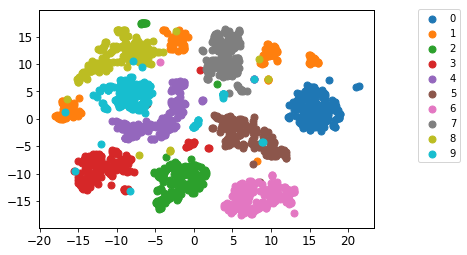

In [76]:
tsne = TSNE(n_components=2)
X_2d_tsne = tsne.fit_transform(X)

for i in range(10):
     plt.scatter(X_2d_tsne[y==i][:,0], X_2d_tsne[y==i][:,1], label=str(i))
plt.legend(bbox_to_anchor=(1.1, 1.05))

In general there are 10 clusters with some satellites. Digit 9 and 1 seem to be the most peppered. Digits 3 and 5 tend to get confused the most and we see that their clusters are close together without overlap.

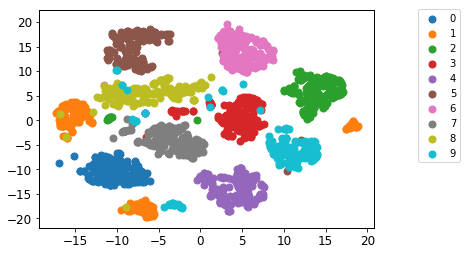

In [77]:
pca = PCA(n_components=2)
X_2d_pca = tsne.fit_transform(X)

for i in range(10):
     plt.scatter(X_2d_pca[y==i][:,0], X_2d_pca[y==i][:,1], label=str(i))
plt.legend(bbox_to_anchor=(1.1, 1.05))

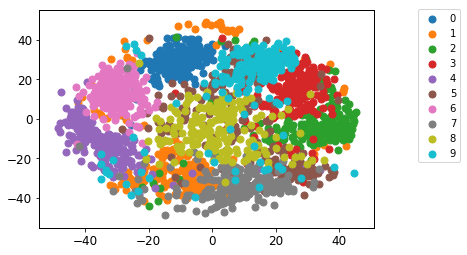

In [78]:
mds = MDS(n_components=2)
X_2d_mds = mds.fit_transform(X)

for i in range(10):
     plt.scatter(X_2d_mds[y==i][:,0], X_2d_mds[y==i][:,1], label=str(i))
plt.legend(bbox_to_anchor=(1.1, 1.05))